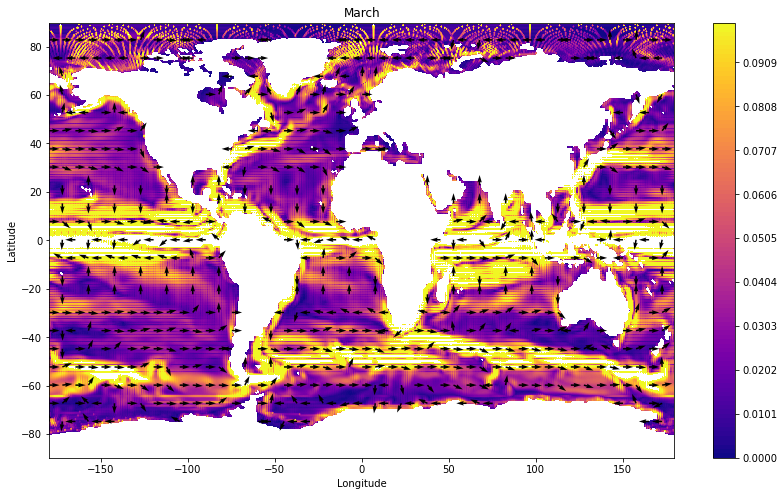

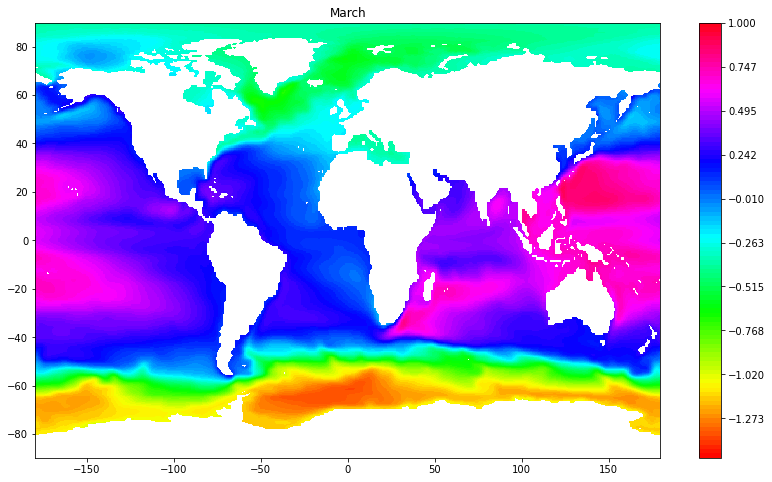

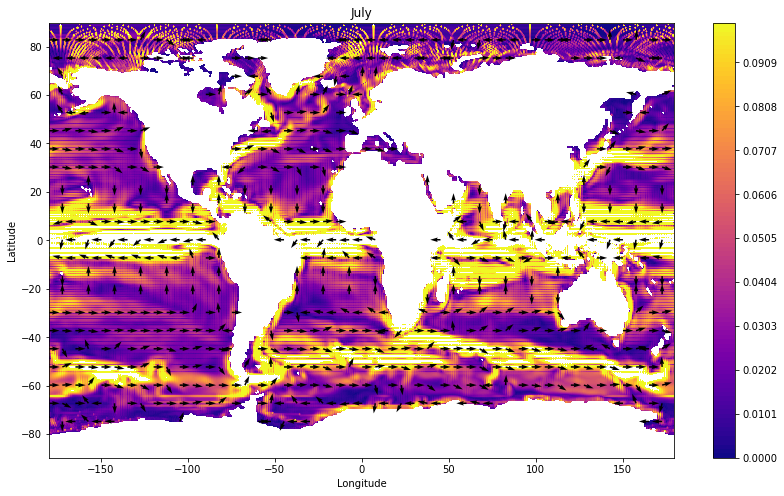

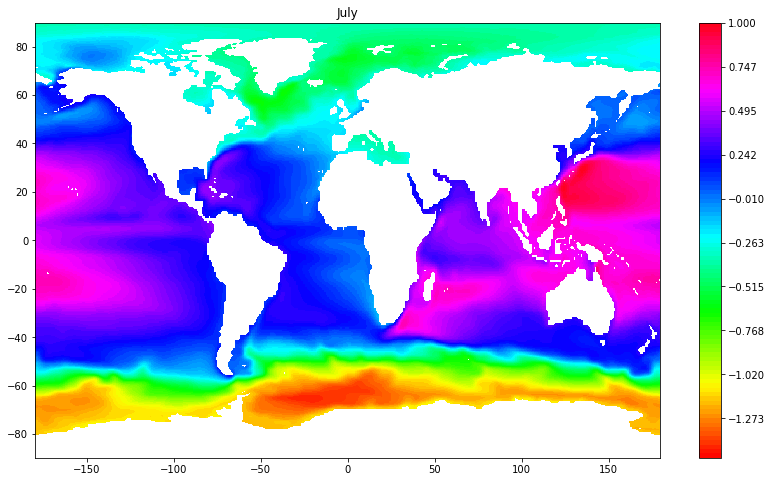

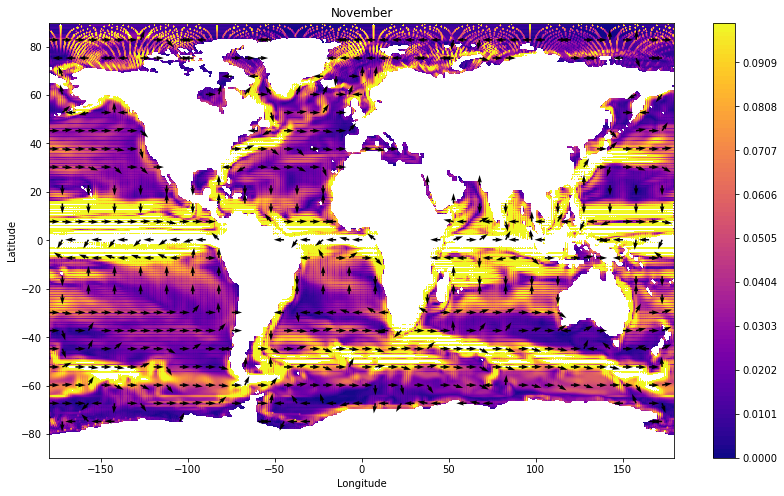

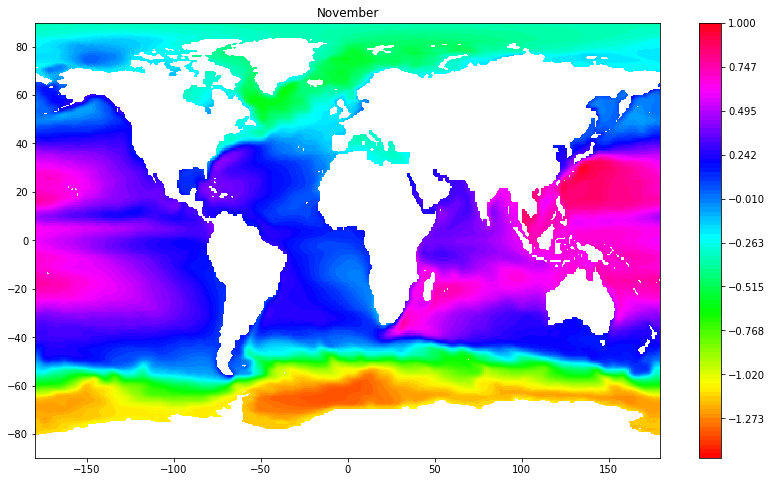

In [22]:
import xarray
import gsw
import numpy as np
import matplotlib.pyplot as plt
import math



lat_array = np.linspace(-89.75, 89.75, 360)     #Lattitude from -89.5 to 89.5 with 0.5 difference
lon_array = np.linspace(-179.75, 179.75, 720)   #Longitude from -179.5 to 179.5 with 0.5 difference

omega = 7.2921*(10**-5)     #Angular speed of Earth

f=2*omega*np.sin(np.deg2rad(lat_array))    #Corolis Parameter
g = 9.8             #Acceleration due to gravity
radius = 6370e3     #Radius of Earth



dlat = 2*np.pi*(0.5/360)*radius      #dy of Fourier series model 
dlon = 2*np.pi*radius*(0.5/360)*np.cos(np.deg2rad(lat_array)).reshape(360,1)* np.ones((360,720))   # dx of Fourier series model

data_array = []
steps = (slice(None, None, 15), slice(None, None, 15))     #spacing between Arrows

#Combining 5 year data in one list

for year in range(2010,2015):
    for month in range(1,13):
        if month<10:
            mon = '0'+str(month)
        else:
            mon = str(month)
        data = xarray.open_dataset('SEA_SURFACE_HEIGHT_mon_mean_{y}-{m}_ECCO_V4r4_latlon_0p50deg.nc'.format(y=year,m=mon))
        new_data = data.loc[dict(longitude=slice(-180,180), latitude=slice(-90,90))].SSH
        data_array.append(new_data[0])
data_arr=np.array(data_array)

# getting average of each months of 5 years

for i in range(1,5):
    if i==1:
        yearly_sum = data_arr[12*(i-1):12*(i),:,:]
    else:
        yearly_sum = yearly_sum + data_arr[12*(i-1):12*(i),:,:]
        
yearly_avg = yearly_sum/5

#Lattitude and Longitude for Graph Axis

lat_grid = np.linspace(-89.75, 89.75, 360).reshape(360,1)* np.ones((360,720))
lon_grid = np.linspace(-179.75, 179.75, 720).reshape(1,720)* np.ones((360,720))


#differnce in the sea surface height along lattitude and longitude (∂ζ)

arr=["March", "July", "November"]

for k in range(2,11,4):
 yav_data=yearly_avg[k]



 reshaped_arr = yav_data[:,0].reshape(len(yav_data[:,0]),1)
 lon_data_proc = np.concatenate((yav_data, reshaped_arr), axis=1)
 lon_diff_data = np.diff(lon_data_proc, axis=1)

 lat_data_proc = np.concatenate((yav_data, yav_data[0,:].reshape(1,len(yav_data[0,:]))), axis=0)
 lat_diff_data = np.diff(lat_data_proc, axis=0)


 ug = (-g/f.reshape(len(f),1))*(lat_diff_data/dlat)  
 vg = (g/f.reshape(len(f),1))*(lon_diff_data/dlon) 



 for i in range(360):
    for j in range (720):
        if(i==359 or j==719):
            ug[i,j]=math.nan
            vg[i,j]=math.nan

 for i in range(170, 190):
    ug[i,j]=math.nan
    vg[i,j]=math.nan
 mag_arr = np.sqrt(ug**2 + vg**2)
 mag_arr[mag_arr == 0] = 'nan'
 ugNormal = ug/mag_arr
 vgNormal = vg/mag_arr


    

 


 plt.figure(figsize=(14,8))
 level=np.linspace(0,0.1,100)
  


 plt.contourf(lon_grid, lat_grid, np.sqrt(ug**2+vg**2),levels=level,cmap=plt.get_cmap('plasma')) #,cmap=plt.get_cmap('Greens')
 plt.colorbar()
 


 plt.quiver(lon_grid[steps], lat_grid[steps],
                 ugNormal[steps], vgNormal[steps],
                 color='black')
 plt.ylabel('Latitude')
 plt.xlabel('Longitude')
 plt.title(arr[int(k/4)]) 

 plt.show()

 plt.figure(figsize=(14,8))
 level=np.linspace(-1.5, 1, 100);
 plt.contourf(lon_grid, lat_grid ,yav_data,levels=level,cmap=plt.get_cmap('hsv'))
 plt.title(arr[int(k/4)]) 
 plt.colorbar() 
 plt.show()   